In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression , Ridge , Lasso ,LassoCV, RidgeCV
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error , mean_absolute_percentage_error
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('ad.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df = df.drop(columns=['Unnamed: 0'])

Text(0.5, 1.0, 'Correlation Heatmap')

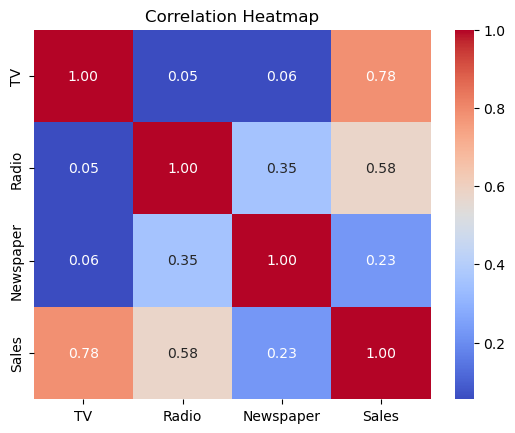

In [6]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')    

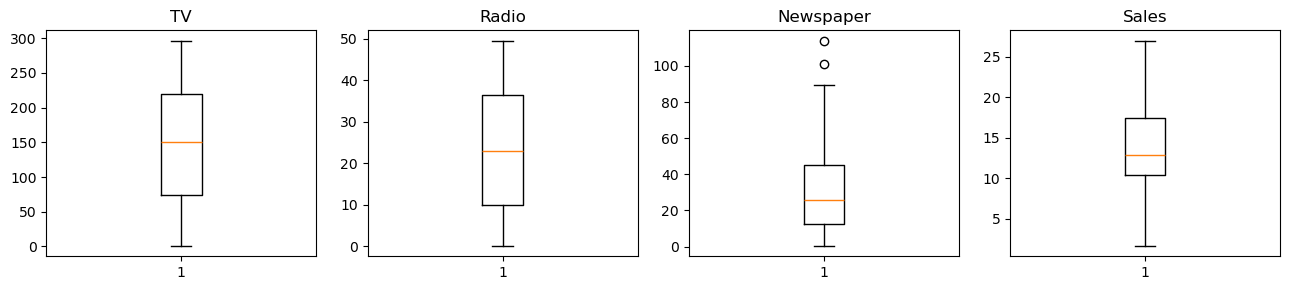

In [7]:
plt.figure(figsize=(13, 3))
for i, col in enumerate(df.columns, 1):
    plt.subplot(1, len(df.columns), i)  
    plt.boxplot(df[col])
    plt.title(col)  

plt.tight_layout()
plt.show()

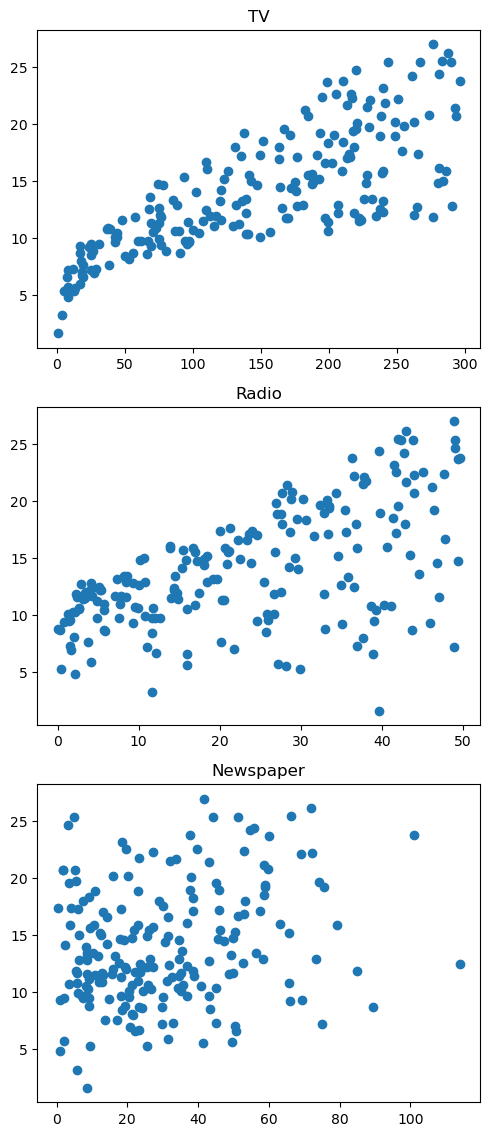

In [8]:
plt.figure(figsize=(5, 15))
for i, col in enumerate(df.columns, 1):
    if col == "Sales":
        continue
    plt.subplot(len(df.columns), 1, i)
    plt.scatter(x=df[col],y=df["Sales"])
    plt.title(col)  

plt.tight_layout()
plt.show()

In [9]:
X = df.drop(columns=['Sales'])
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)


In [11]:
print(f"Mean absolute error Train = {mean_absolute_error(y_pred=y_train_pred , y_true=y_train)}")
print(f"Mean squared error Train = {mean_squared_error(y_pred=y_train_pred , y_true=y_train)}")
print(f"MAPE Train: {mean_absolute_percentage_error(y_train, y_train_pred)* 100:.2f}%")

Mean absolute error Train = 1.1984678961500137
Mean squared error Train = 2.705129423081414
MAPE Train: 13.65%


In [12]:
print(f"Mean absolute error test = {mean_absolute_error(y_pred=y_pred , y_true=y_test)}")
print(f"Mean squared error test = {mean_squared_error(y_pred=y_pred , y_true=y_test)}")
print(f"MAPE test: {mean_absolute_percentage_error(y_test, y_pred) * 100:.2f}%")

Mean absolute error test = 1.4607567168117606
Mean squared error test = 3.1740973539761046
MAPE test: 15.20%


In [13]:
alphas = np.arange(0.1, 3.1, 0.1)  

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_cv.alpha_)


Best alpha for Lasso: 1.1


In [14]:
lasso = Lasso(alpha=1.1)  
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

In [15]:
print(f"Mean absolute error test = {mean_absolute_error(y_pred=y_pred_lasso , y_true=y_test)}")
print(f"Mean squared error test = {mean_squared_error(y_pred=y_pred_lasso , y_true=y_test)}")
print(f"MAPE test: {mean_absolute_percentage_error(y_test, y_pred_lasso) * 100:.2f}%")

Mean absolute error test = 1.4516177115482232
Mean squared error test = 3.141305570430956
MAPE test: 14.98%


In [16]:
alphas = np.arange(1, 1501 , 1)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_cv.alpha_)

Best alpha for Ridge: 1481


In [17]:
ridge = Ridge(alpha=ridge_cv.alpha_) 
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [18]:
print(f"Mean absolute error ridge = {mean_absolute_error(y_pred=y_pred_ridge , y_true=y_test)}")
print(f"Mean squared error Ridge = {mean_squared_error(y_pred=y_pred_ridge , y_true=y_test)}")
print(f"MAPE Ridge: {mean_absolute_percentage_error(y_test, y_pred_ridge) * 100:.2f}%")

Mean absolute error ridge = 1.4728994880524042
Mean squared error Ridge = 3.187394603908664
MAPE Ridge: 15.03%


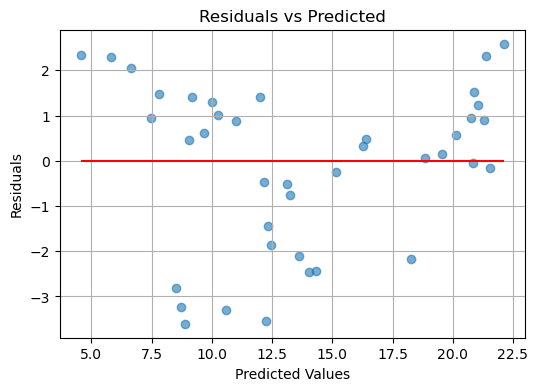

In [19]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


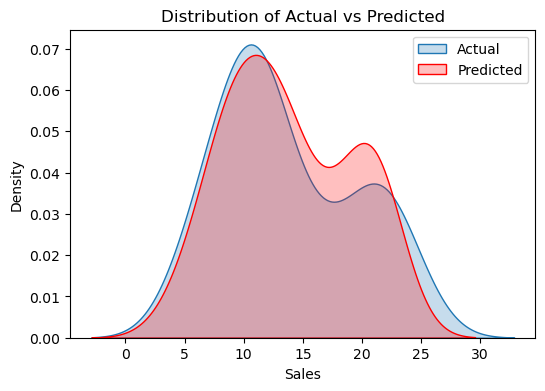

In [20]:
plt.figure(figsize=(6, 4))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred, label='Predicted', fill=True, color='red')
plt.title("Distribution of Actual vs Predicted")
plt.legend()
plt.show()


In [21]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_Train_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_Train_poly, y_train)
X_test_poly = poly.transform(X_test)
y_pred_poly = poly_model.predict(X_test_poly)

print(f"Mean absolute error poly = {mean_absolute_error(y_pred=y_pred_poly , y_true=y_test)}")
print(f"Mean squared error Ploy = {mean_squared_error(y_pred=y_pred_poly , y_true=y_test)}")
print(f"MAPE Poly: {mean_absolute_percentage_error(y_test, y_pred_poly) * 100:.2f}%")

Mean absolute error poly = 0.3886817048691672
Mean squared error Ploy = 0.29456840910102394
MAPE Poly: 3.52%


In [22]:
alphas = np.arange(0.1, 3.1, 0.1)

lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_Train_poly, y_train)

print("Best alpha for Lasso:", lasso_cv.alpha_)


Best alpha for Lasso: 0.30000000000000004


In [23]:
lasso = Lasso(alpha=lasso_cv.alpha_)  
lasso.fit(X_Train_poly, y_train)

y_pred_lasso = lasso.predict(X_test_poly)

In [24]:
print(f"Mean absolute error ridge = {mean_absolute_error(y_pred=y_pred_lasso , y_true=y_test)}")
print(f"Mean squared error Ridge = {mean_squared_error(y_pred=y_pred_lasso , y_true=y_test)}")
print(f"MAPE Ridge: {mean_absolute_percentage_error(y_test, y_pred_lasso) * 100:.2f}%")

Mean absolute error ridge = 0.355225723636147
Mean squared error Ridge = 0.25480339437476557
MAPE Ridge: 3.16%


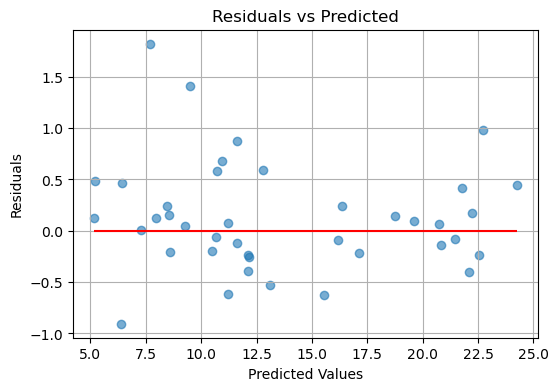

In [25]:
residuals = y_test - y_pred_poly

plt.figure(figsize=(6, 4))
plt.scatter(y_pred_poly, residuals, alpha=0.6)
plt.hlines(0, xmin=y_pred_poly.min(), xmax=y_pred_poly.max(), colors='r', linestyles='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


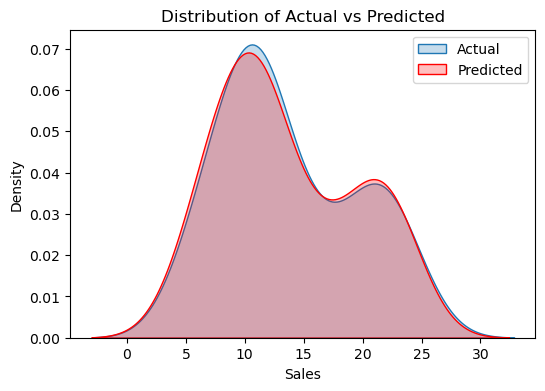

In [26]:
plt.figure(figsize=(6, 4))
sns.kdeplot(y_test, label='Actual', fill=True)
sns.kdeplot(y_pred_poly, label='Predicted', fill=True, color='red')
plt.title("Distribution of Actual vs Predicted")
plt.legend()
plt.show()